<a href="https://colab.research.google.com/github/ketki000/Major-Project/blob/main/Major-Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [198]:
df = pd.read_csv('/content/drive/My Drive/Smartknower Internship/ML Notes/CoronaTweets.csv')
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...
3,3804,48756,"ÜT: 36.319708,-82.363649",16-03-2020,As news of the regions first confirmed COVID-...
4,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...
...,...,...,...,...,...
9994,16494,61446,"Bury Saint Edmunds, England",21-03-2020,I have created a page on my website offering a...
9995,16495,61447,Zamunda,21-03-2020,Healthcare workers\r\r\nSupermarket staff\r\r\...
9996,16496,61448,"Kathmandu, Nepal",21-03-2020,Supermarket In Denmark Uses Price Trick To Sto...
9997,16497,61449,Ferguson at Heart,21-03-2020,Toronto is in a full lockdown and Canada has p...


In [181]:
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['OriginalTweet'] = df['OriginalTweet'].apply(cleanTxt)

# Show the cleaned tweets
df
    

,UserName,ScreenName,Location,TweetAt,OriginalTweet
0,3799,48751,London,16-03-2020,_Gahan and and
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...
3,3804,48756,"ÜT: 36.319708,-82.363649",16-03-2020,As news of the regions first confirmed COVID-...
4,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...
...,...,...,...,...,...
9994,16494,61446,"Bury Saint Edmunds, England",21-03-2020,I have created a page on my website offering a...
9995,16495,61447,Zamunda,21-03-2020,Healthcare workers\r\r\nSupermarket staff\r\r\...
9996,16496,61448,"Kathmandu, Nepal",21-03-2020,Supermarket In Denmark Uses Price Trick To Sto...
9997,16497,61449,Ferguson at Heart,21-03-2020,Toronto is in a full lockdown and Canada has p...


In [182]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['OriginalTweet'].apply(getSubjectivity)
df['Polarity'] = df['OriginalTweet'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Subjectivity,Polarity
0,3799,48751,London,16-03-2020,_Gahan and and,0.000000,0.000000
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,0.205128,0.166667
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,0.300000,-0.200000
3,3804,48756,"ÜT: 36.319708,-82.363649",16-03-2020,As news of the regions first confirmed COVID-...,0.355000,0.098333
4,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,0.000000,0.000000
...,...,...,...,...,...,...,...
9994,16494,61446,"Bury Saint Edmunds, England",21-03-2020,I have created a page on my website offering a...,0.000000,0.150000
9995,16495,61447,Zamunda,21-03-2020,Healthcare workers\r\r\nSupermarket staff\r\r\...,0.333333,0.488281
9996,16496,61448,"Kathmandu, Nepal",21-03-2020,Supermarket In Denmark Uses Price Trick To Sto...,0.500000,0.258333
9997,16497,61449,Ferguson at Heart,21-03-2020,Toronto is in a full lockdown and Canada has p...,0.266667,0.116667


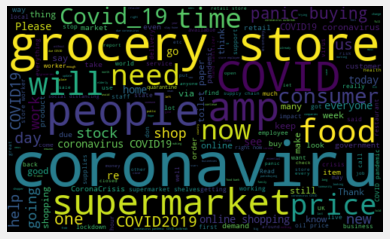

In [183]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['OriginalTweet']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [184]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Subjectivity,Polarity,Analysis
0,3799,48751,London,16-03-2020,_Gahan and and,0.000000,0.000000,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,0.205128,0.166667,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,0.300000,-0.200000,Negative
3,3804,48756,"ÜT: 36.319708,-82.363649",16-03-2020,As news of the regions first confirmed COVID-...,0.355000,0.098333,Positive
4,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,0.000000,0.000000,Neutral
...,...,...,...,...,...,...,...,...
9994,16494,61446,"Bury Saint Edmunds, England",21-03-2020,I have created a page on my website offering a...,0.000000,0.150000,Positive
9995,16495,61447,Zamunda,21-03-2020,Healthcare workers\r\r\nSupermarket staff\r\r\...,0.333333,0.488281,Positive
9996,16496,61448,"Kathmandu, Nepal",21-03-2020,Supermarket In Denmark Uses Price Trick To Sto...,0.500000,0.258333,Positive
9997,16497,61449,Ferguson at Heart,21-03-2020,Toronto is in a full lockdown and Canada has p...,0.266667,0.116667,Positive


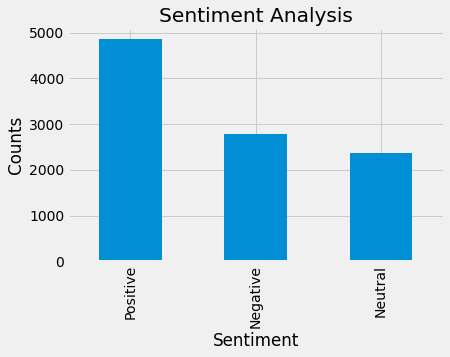

In [185]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

In [187]:
# Input and Output
x = df.iloc[:,4].values  #input-message
y = df.iloc[:,7].values  #output-label

In [188]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [189]:
x_train.shape

(6999,)

In [190]:
x_test.shape

(3000,)

In [191]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
# Pipeline([('Variable1',Method1()),('Variable2',Method2())])

In [192]:
text_model = Pipeline([('tfidf',TfidfVectorizer()),('model',MultinomialNB())])
text_model

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('model',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [193]:
text_model.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('model',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [194]:
y_pred = text_model.predict(x_test)
y_pred

array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype='<U8')

In [195]:
y_test


array(['Negative', 'Negative', 'Neutral', ..., 'Positive', 'Positive',
       'Positive'], dtype=object)

In [196]:
# Evaluation : Accuracy Score,Confusion matrix
from sklearn.metrics  import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)

0.5

In [197]:
confusion_matrix(y_pred,y_test)

array([[  24,    3,    1],
       [   1,   17,    2],
       [ 812,  681, 1459]])